In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import pandas as pd
import sympy as sym

In [2]:
DataFrame = pd.read_excel("data.xlsx")
DataFrame

,glicerina,recina,oliva,trans
0,1.77,1.58,0.44,0.84
1,1.91,1.54,0.34,0.98
2,1.80,1.59,0.41,0.82
3,1.61,1.46,0.56,0.86
4,1.47,1.51,0.37,1.00


In [3]:
h_glicerina = 52e-2
h_recina = 51e-2
h_oliva = 49.5e-2
h_trans = 43e-2

t_glicerina = DataFrame["glicerina"].to_numpy()
t_recina = DataFrame["recina"].to_numpy()
t_oliva = DataFrame["oliva"].to_numpy()
t_trans = DataFrame["trans"].to_numpy()
t_glicerina,t_oliva,t_recina,t_trans

(array([1.77, 1.91, 1.8 , 1.61, 1.47]),
 array([0.44, 0.34, 0.41, 0.56, 0.37]),
 array([1.58, 1.54, 1.59, 1.46, 1.51]),
 array([0.84, 0.98, 0.82, 0.86, 1.  ]))

0.15445387661046256 0.07605261336732619 0.047581509013481314 0.07483314773547885
1.7120000000000002 0.42400000000000004 1.536 0.9


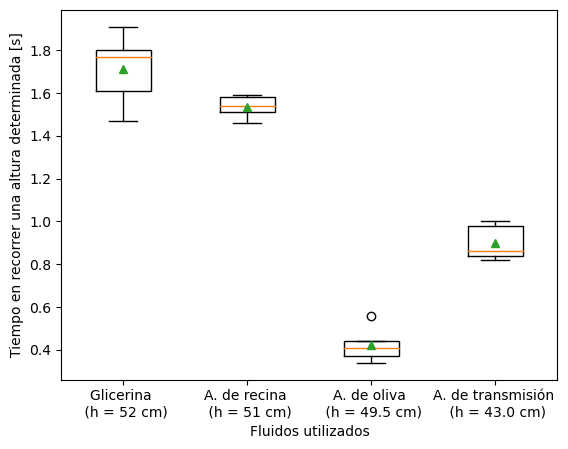

In [11]:
plt.boxplot(DataFrame,labels=["Glicerina \n (h = 52 cm)","A. de recina \n (h = 51 cm)","A. de oliva \n (h = 49.5 cm)","A. de transmisión \n (h = 43.0 cm)"],showmeans=True)
plt.ylabel("Tiempo en recorrer una altura determinada [s]")
plt.xlabel("Fluidos utilizados")

print(np.std(t_glicerina),np.std(t_oliva),np.std(t_recina),np.std(t_trans))
print(np.mean(t_glicerina),np.mean(t_oliva),np.mean(t_recina),np.mean(t_trans))

times = np.array([np.mean(t_glicerina),np.mean(t_oliva),np.mean(t_recina),np.mean(t_trans)])
heights = np.array([52e-2,49.5e-2,51e-2,43e-2])
un_t = np.array([np.std(t_glicerina),np.std(t_oliva),np.std(t_recina),np.std(t_trans)])
un_h = np.ones_like(un_t)*0.25e-2
plt.savefig("Tiempos.pdf")

In [12]:
def GetPropagation(var,exp,meas,uncert):
    prop = 0
    medido = exp
    for i in range(len(meas)):
        prop += (sym.diff(exp,var[i]))**2*uncert[i]**2
    for i in range(len(var)):
        prop = prop.subs(var[i],meas[i])
        medido = medido.subs(var[i],meas[i])
    return medido,sym.sqrt(prop)
    
var = sym.symbols("h t")

measures = []
uncerts = []
exp = var[0]/var[1]

for i in range(4):
    measures.append([heights[i],times[i]])
    uncerts.append([un_h[i],un_t[i]])

velocities = []
un_velocities =[]
    
for i in range(len(measures)):
    velocities.append(GetPropagation(var,exp,measures[i],uncerts[i])[0])
    un_velocities.append(GetPropagation(var,exp,measures[i],uncerts[i])[1])


In [29]:
R = 1.31e-2/2
un_R = 0.25e-2
var = sym.symbols("R v")
densities = np.array([1200,902,969,878])
viscosity = []
for i in range(len(densities)):
    exp1 = 2*var[0]**2*(7850 - densities[i])*9.81/(9*var[1])
    viscosity.append(GetPropagation(var,exp1,[R,velocities[i]],[un_R,un_velocities[i]])[0])
    
densities,velocities,viscosity

(array([1200,  902,  969,  878]),
 [0.303738317757009, 1.16745283018868, 0.332031250000000, 0.477777777777778],
 [2.04767560146154, 0.556620966429091, 1.93825847250824, 1.36480475176744])

In [31]:
Re = densities*velocities*R*2/viscosity
Re

array([2.33179823587885, 24.7832132888814, 2.17451467085337,
       4.02643999980799], dtype=object)